<a href="https://colab.research.google.com/github/gamalieltoka/Machine-learning/blob/master/Titanic_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing require libiraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Importing and understanding the dataset

# Test dataset

In [ ]:
try:
    from google.colab import files  # will fail outside Colab
    uploaded = files.upload()
    print("Uploaded files:", list(uploaded.keys()))
except Exception as e:
    print("If you're in Colab, this will work. Otherwise, skip to Option 2 or load from local path.")

Saving test (1).csv to test (1) (5).csv
Uploaded files: ['test (1) (5).csv']


In [ ]:
csv_path = 'test (1).csv'
if csv_path:
    test_df = pd.read_csv(csv_path)

In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test_df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [ ]:
test_df['Age'] = test_df.Age.fillna(df.Age.mean())

In [ ]:
test_df['Cabin'].value_counts()

,count
Cabin,
B57 B59 B63 B66,3
B45,2
C23 C25 C27,2
C78,2
C31,2
...,...
B41,1
C7,1
D40,1


In [ ]:
modes = ['B57', 'B59', 'B59', 'B66']

test_df['Cabin'] = test_df['Cabin'].apply(
    lambda x: np.random.choice(modes) if pd.isna(x) else x
)

In [ ]:
test_df['Fare'] = test_df.Fare.fillna(df.Fare.mean())

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [ ]:
test_df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


In [ ]:
test_df['Fare'].value_counts()

,count
Fare,
7.7500,21
26.0000,19
8.0500,17
13.0000,17
7.8958,11
...,...
13.8625,1
7.7208,1
90.0000,1


# Train dataset

In [ ]:
try:
    from google.colab import files  # will fail outside Colab
    uploaded = files.upload()
    print("Uploaded files:", list(uploaded.keys()))
except Exception as e:
    print("If you're in Colab, this will work. Otherwise, skip to Option 2 or load from local path.")

Saving train (1).csv to train (1) (5).csv
Uploaded files: ['train (1) (5).csv']


In [ ]:
csv_path = 'train (1).csv'
if csv_path:
    df = pd.read_csv(csv_path)

Shape of the dataset

In [ ]:
df.shape

(891, 12)

Printing out a few columns

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
757,758,0,2,"Bailey, Mr. Percy Andrew",male,18.0,0,0,29108,11.5000,NaN,S
264,265,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,NaN,S
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.0,1,0,2651,11.2417,NaN,C


# 3. Exploration Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df['Age'] = df.Age.fillna(df.Age.mean())

In [ ]:
df['Embarked'] = df.Embarked.fillna(df.Embarked.mode()[0])

In [ ]:
df['Cabin'].value_counts()

,count
Cabin,
G6,4
C23 C25 C27,4
B96 B98,4
F2,3
D,3
...,...
E17,1
A24,1
C50,1


In [ ]:
modes = ['B6', 'B8', 'G6']

df['Cabin'] = df['Cabin'].apply(
    lambda x: np.random.choice(modes) if pd.isna(x) else x
)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Desciption

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Analysing the "target" variable

In [ ]:
df['Survived'].describe()

,Survived
count,891.000000
mean,0.383838
std,0.486592
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
df['Survived'].unique()

array([0, 1])

Obviously, this is Classification Problem and require Classification solution, with the target variable with "0" and "1" value

Observing the correlation between Variables

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
print(numeric_df.corr()['Survived'].abs().sort_values(ascending=False))

Survived       1.000000
Pclass         0.338481
Fare           0.257307
Parch          0.081629
Age            0.069809
SibSp          0.035322
PassengerId    0.005007
Name: Survived, dtype: float64


# 4. Data Visualization

Now let see various visual representations of the data to understand more about relationship between various feautures.

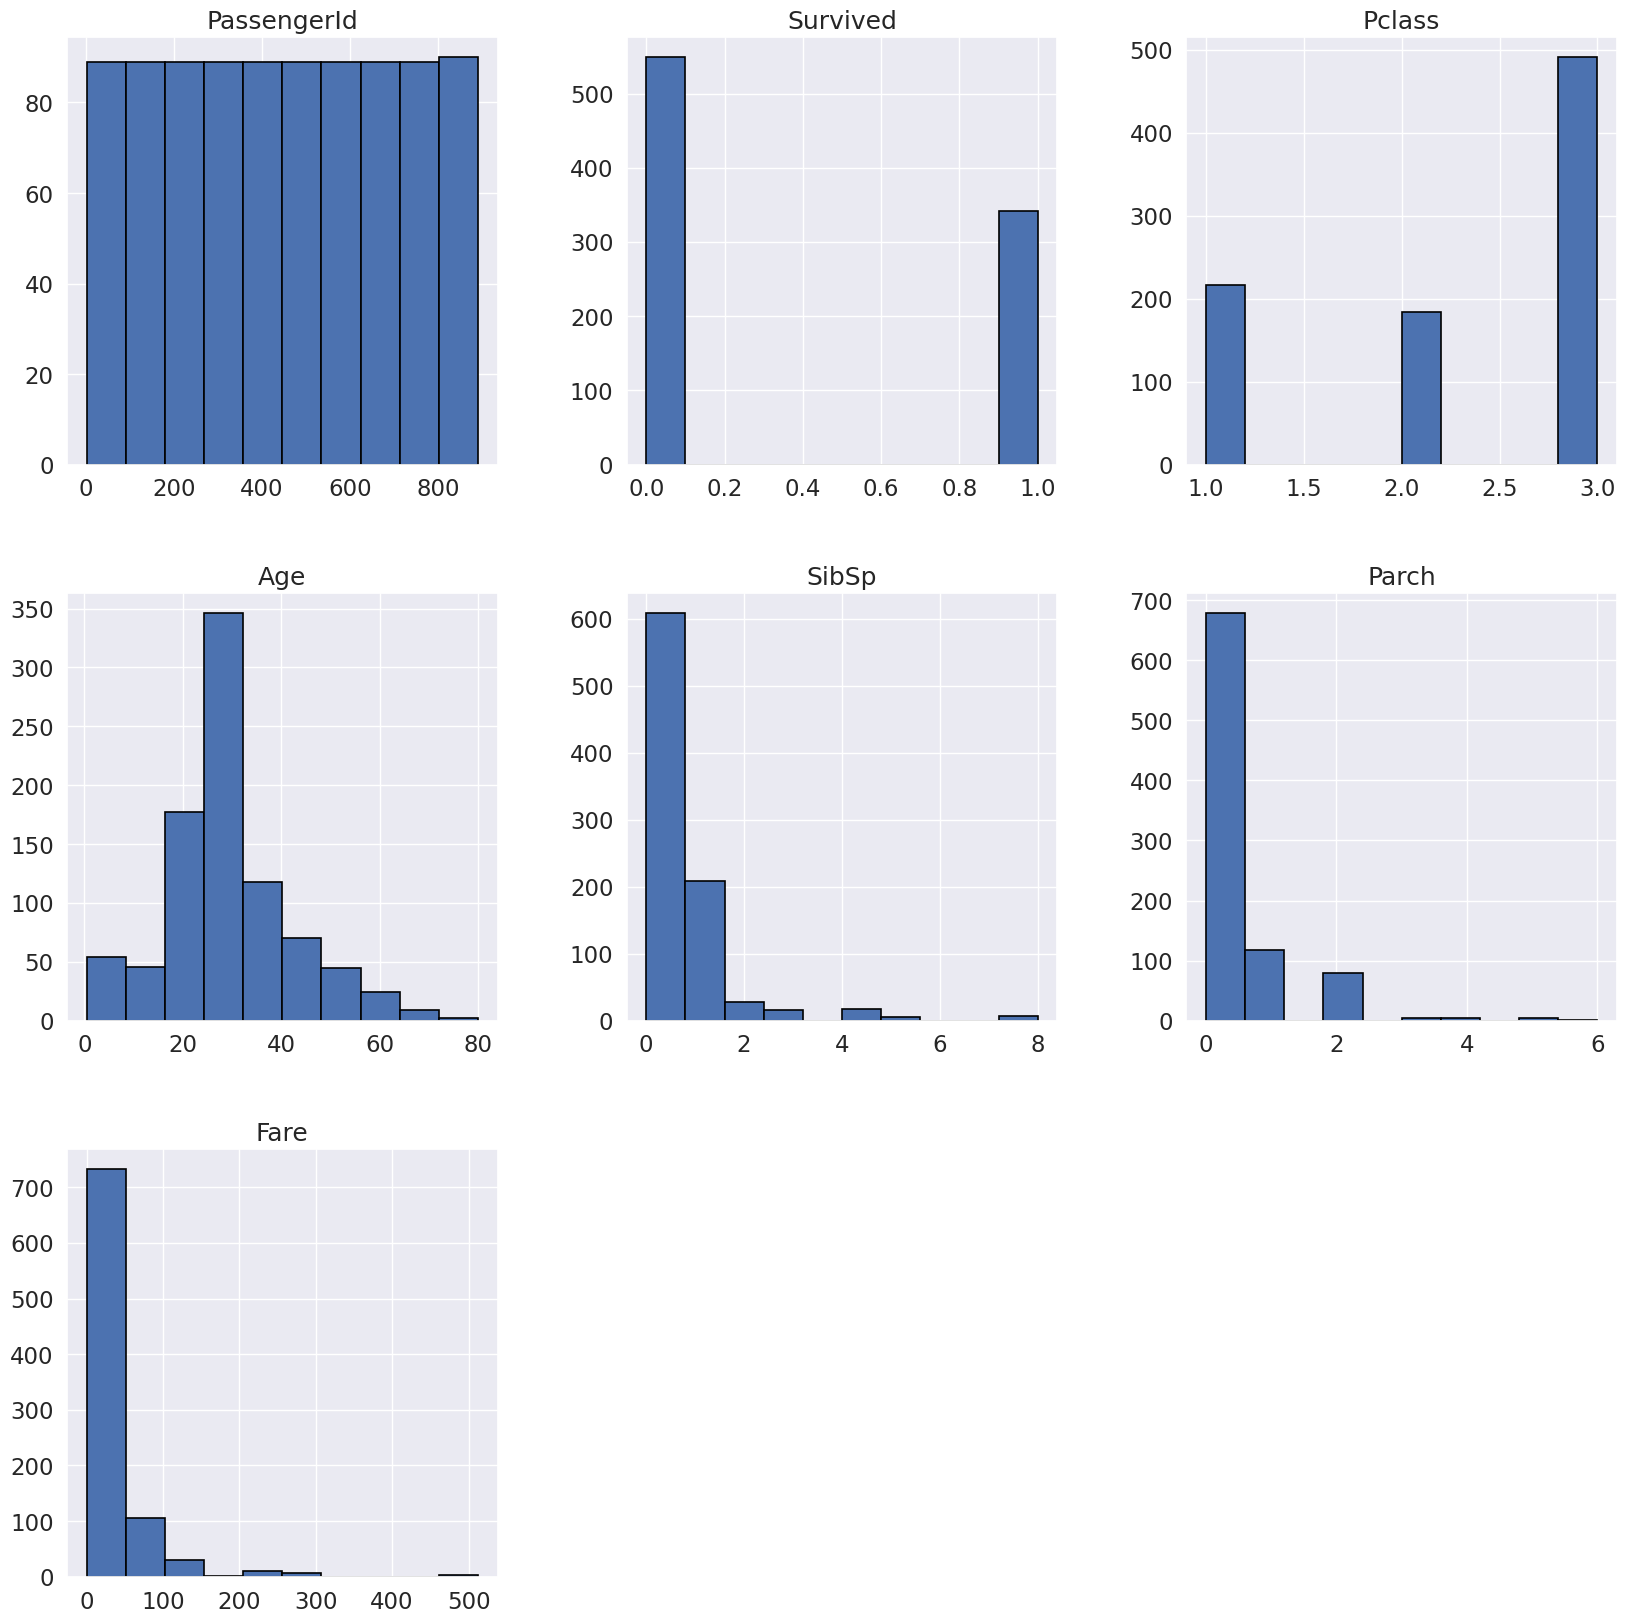

In [ ]:
sns.set(font_scale=1.5)
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

Visual illustration of categorical variables

In [ ]:
categorical_values = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_values.append(column)

PassengerId : [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 

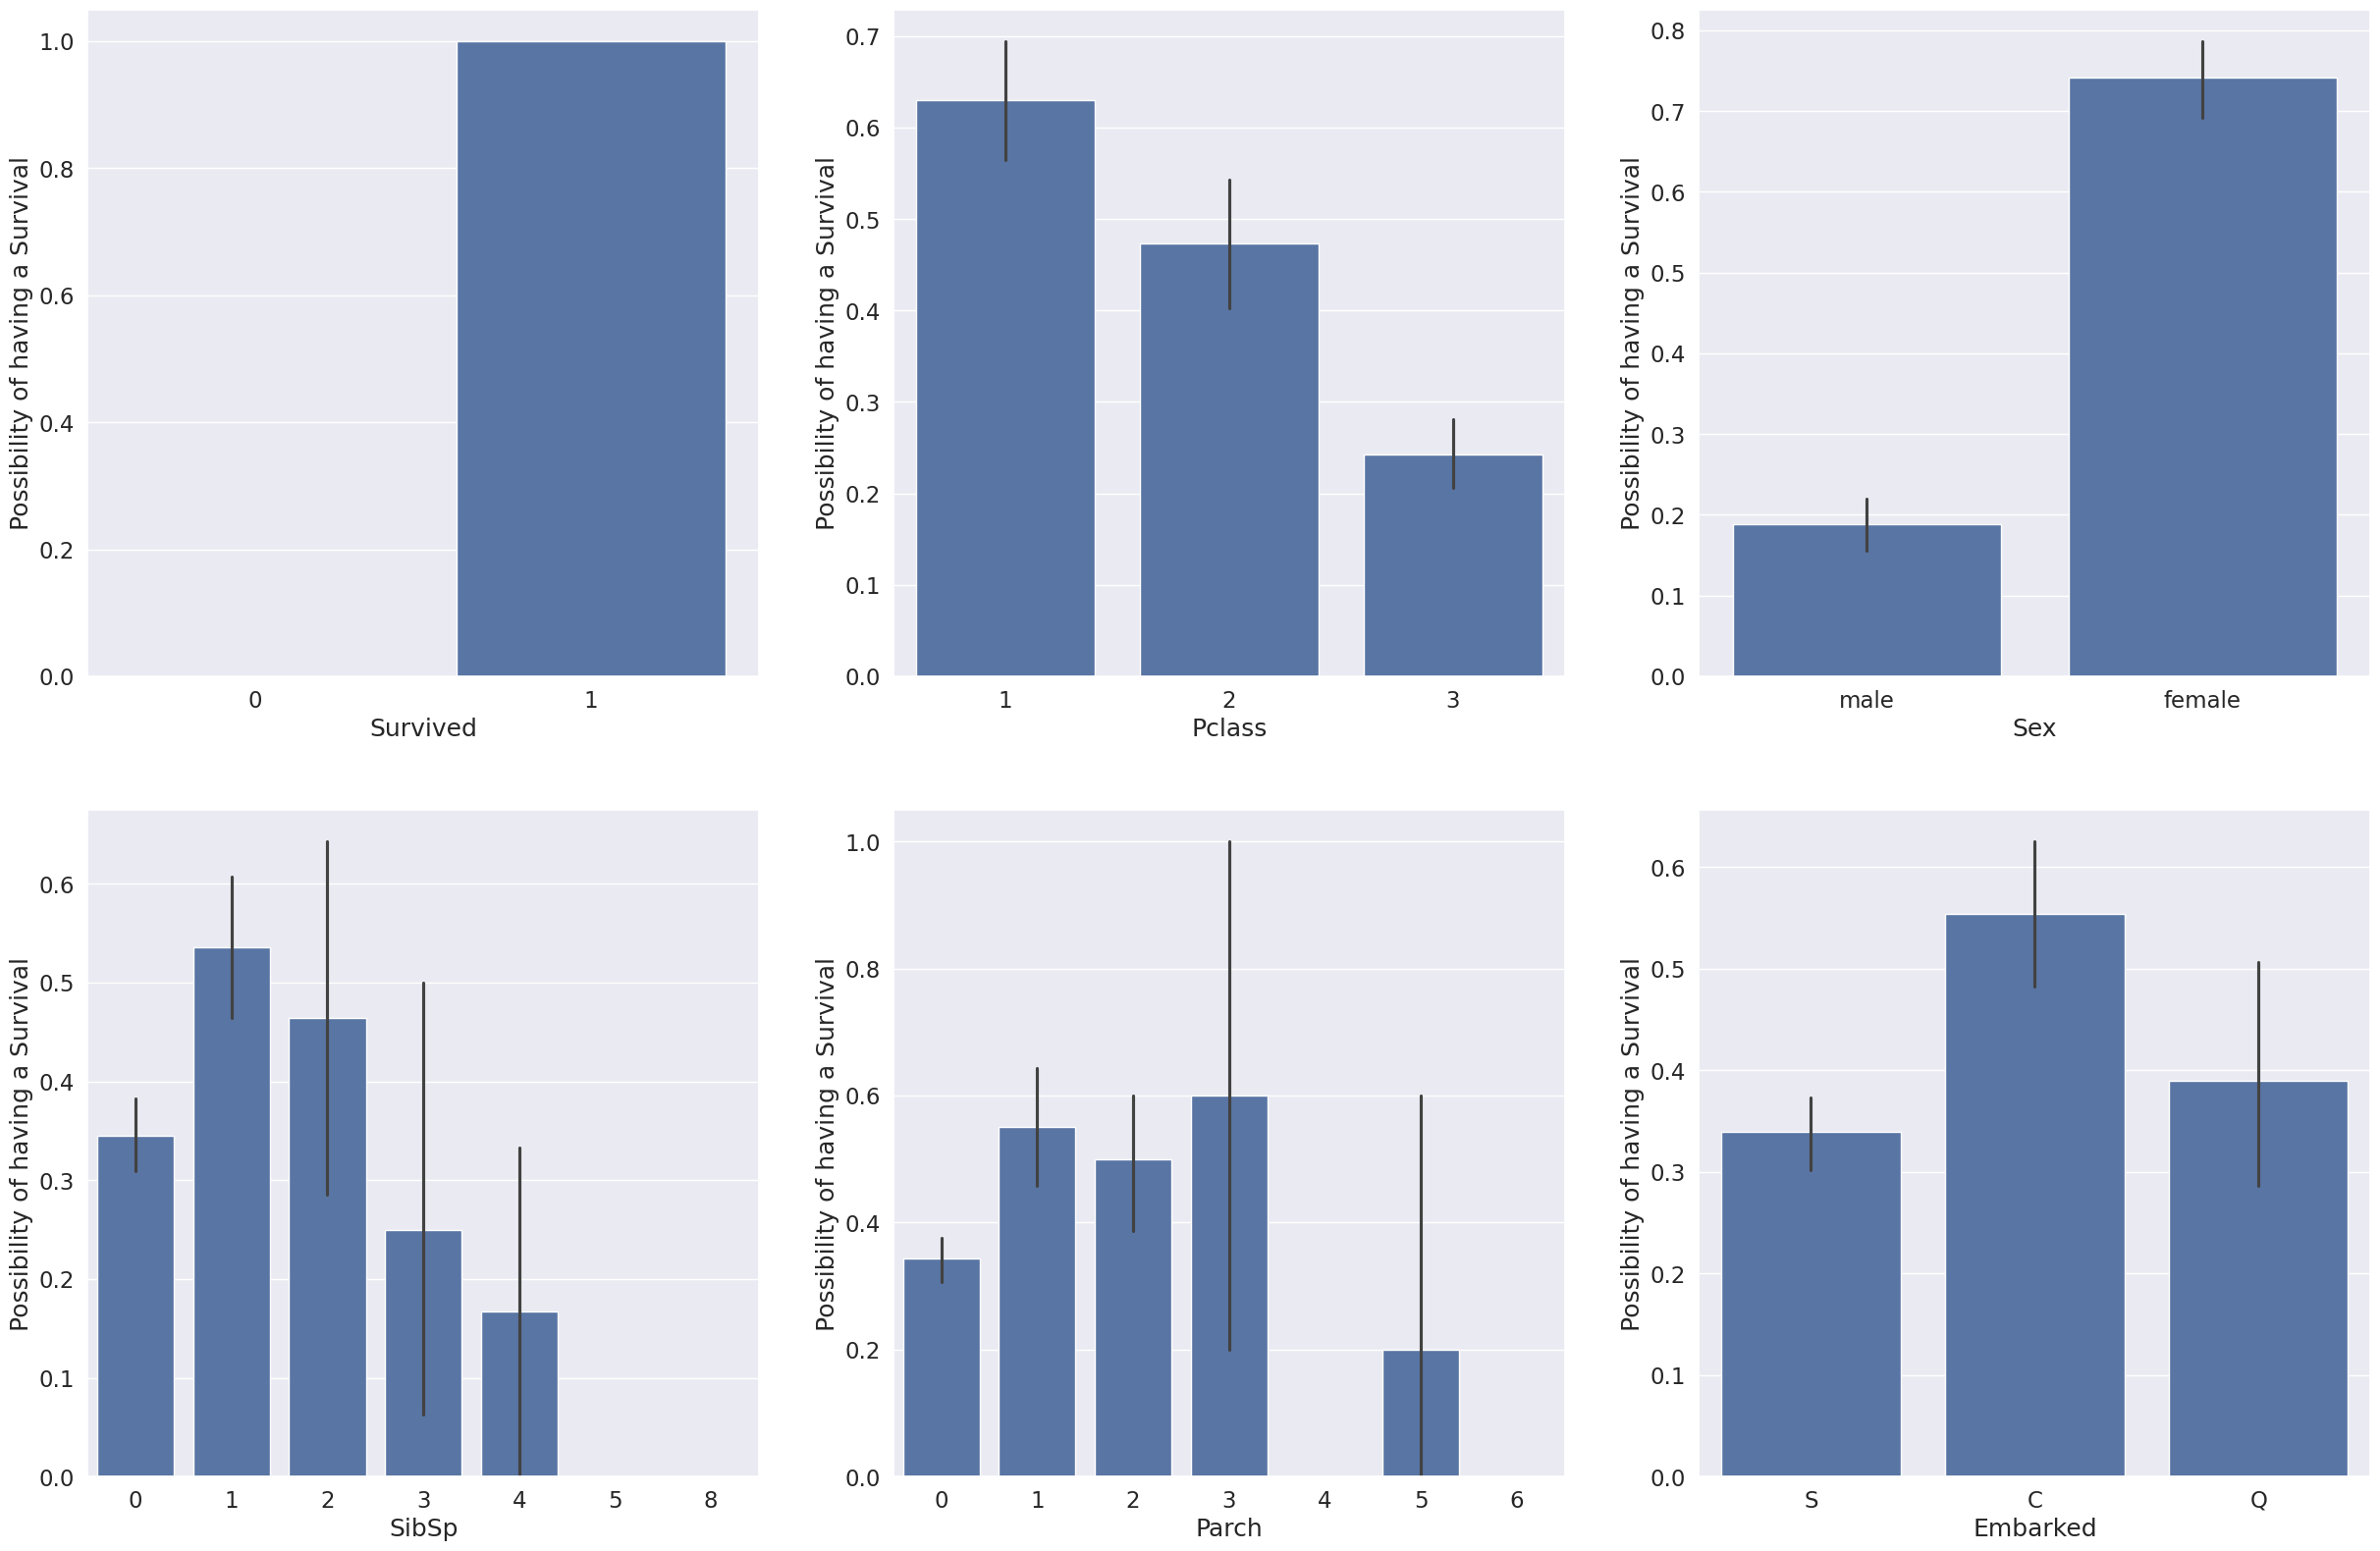

In [ ]:
plt.figure(figsize=(30, 30))
for i, column in enumerate(categorical_values, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x=f"{column}", y='Survived', data=df)
    plt.ylabel('Possibility of having a Survival')
    plt.xlabel(f'{column}')

<Axes: >

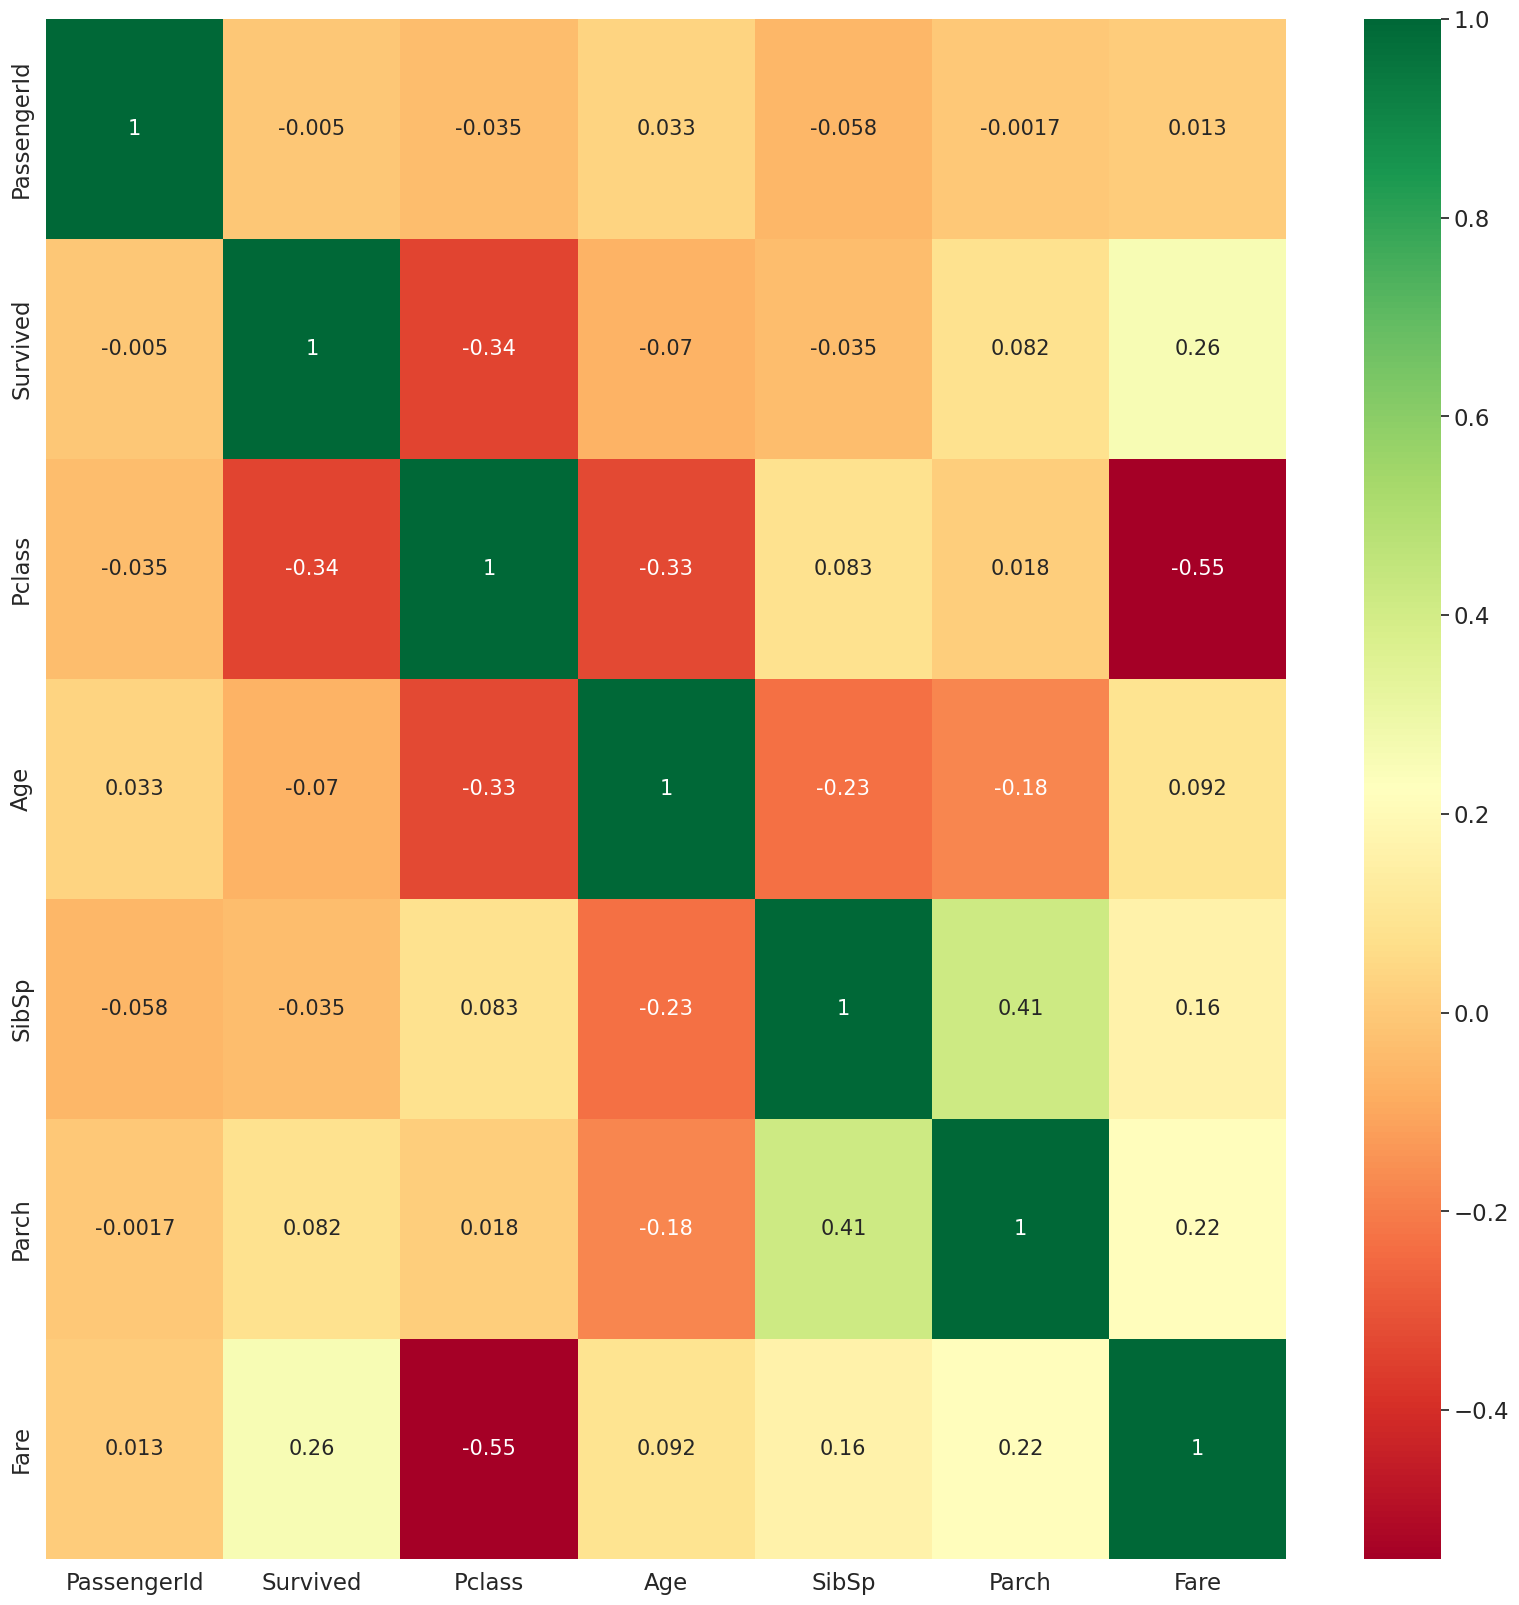

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap="RdYlGn", annot_kws={"size":15})

# Train/validation split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(columns=['Survived'], axis=1)
y = df['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
len(X_train), len(X_val)

(712, 179)

# Identification and preprocessing of categorical and numerical features

In [ ]:
categorical_features = X_train.select_dtypes(include=['object', 'int64']).columns
numerical_features = X_train.select_dtypes(include=['float64']).columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 Index(['Age', 'Fare'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket',
       'Cabin', 'Embarked'],
      dtype='object'))])

In [ ]:
pip install imbalanced-learn

# Handle class imbalance

In [ ]:
from imblearn.over_sampling import SMOTE

from collections import Counter
import seaborn as sns

Class distribution before handling imbalance: Counter({0: 439, 1: 273})


<Axes: xlabel='Survived', ylabel='count'>

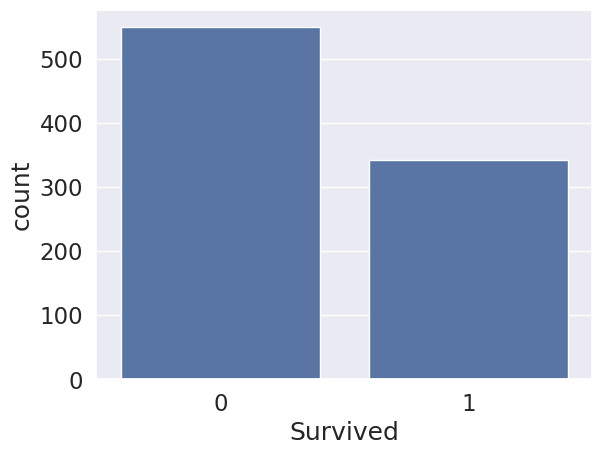

In [ ]:
print("Class distribution before handling imbalance:", Counter(y_train))
sns.countplot(x ='Survived' , data = df)

Class distribution after SMOTE: Counter({1: 439, 0: 439})


<Axes: xlabel='Survived', ylabel='count'>

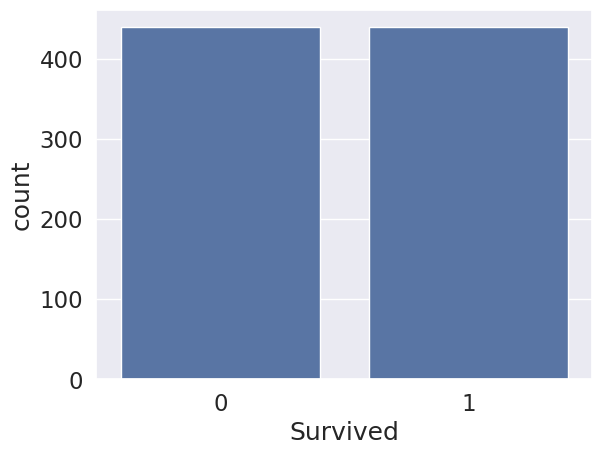

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(preprocessor.fit_transform(X_train), y_train)

print("Class distribution after SMOTE:", Counter(y_train_resampled))
sns.countplot(x ='Survived' , data = pd.DataFrame(y_train_resampled, columns=['Survived']))

# Define the model evaluation function

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

In [ ]:
def build_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Model", threshold=0.5):
    """
    Trains a given model, makes predictions on the training and test sets,
    and calculates and displays the confusion matrix, various evaluation metrics,
    and ROC/PR curves with AUC.  Allows setting a custom threshold.
    """
    model.fit(X_train, y_train)
    y_pred_train_proba = None
    y_pred_test_proba = None

    if hasattr(model, "predict_proba"):
        y_pred_proba_train = model.predict_proba(X_train)[:, 1]
        y_pred_proba_test = model.predict_proba(X_test)[:, 1]

    # Use threshold to make predictions
    y_pred_train = (y_pred_proba_train >= threshold).astype(int) if y_pred_proba_train is not None else model.predict(X_train_processed)
    y_pred_test = (y_pred_proba_test >= threshold).astype(int) if y_pred_proba_test is not None else model.predict(X_test_processed)

    print(f"--- {model_name} Evaluation (Threshold = {threshold:.2f})---")

    for name, y_true, y_pred, y_pred_proba in [("Training Set", y_train, y_pred_train, y_pred_proba_train),
                                                 ("Validation Set", y_test, y_pred_test, y_pred_proba_test)]:
        print(f"\n--- {name} ---")
        cm = confusion_matrix(y_true, y_pred)
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)

        TN, FP, FN, TP = cm.ravel()
        TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
        FPR = FP / (FP + TN) if (FP + TN) > 0 else 0
        TNR = TN / (TN + FP) if (TN + FP) > 0 else 0
        FNR = FN / (FN + TP) if (FN + TP) > 0 else 0

        print("Confusion Matrix:\n", cm)
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall (TPR or Sensitivity): {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"TPR (True Positive Rate): {TPR:.4f}")
        print(f"FPR (False Positive Rate): {FPR:.4f}")
        print(f"TNR (True Negative Rate): {TNR:.4f}")
        print(f"FNR (False Negative Rate): {FNR:.4f}")

        if y_pred_proba is not None:
            # ROC Curve
            fpr, tpr, thresholds_roc = roc_curve(y_true, y_pred_proba)
            roc_auc = roc_auc_score(y_true, y_pred_proba)
            plt.figure(figsize=(8, 6))
            plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve - {model_name} ({name})')
            plt.legend(loc='lower right')
            plt.show()

            # PR Curve
            precision_pr, recall_pr, thresholds_pr = precision_recall_curve(y_true, y_pred_proba)
            auc_pr = auc(recall_pr, precision_pr)
            plt.figure(figsize=(8, 6))
            plt.plot(recall_pr, precision_pr, color='blue', lw=2, label=f'PR curve (AUC = {auc_pr:.2f})')
            plt.plot([0, 1], [y_true.mean(), y_true.mean()], color='gray', lw=2, linestyle='--', label='Random classifier')
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.title(f'PR Curve - {model_name} ({name})')
            plt.legend(loc='upper right')
            plt.show()

    print("-" * 30)
    return model


In [ ]:
X_val_processed = preprocessor.transform(X_val)

# Logistic Regression (No regularization)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


--- Logistic Regression (No regularization) Evaluation (Threshold = 0.50)---

--- Training Set ---
Confusion Matrix:
 [[439   0]
 [  0 439]]
Accuracy: 1.0000
Precision: 1.0000
Recall (TPR or Sensitivity): 1.0000
F1 Score: 1.0000
TPR (True Positive Rate): 1.0000
FPR (False Positive Rate): 0.0000
TNR (True Negative Rate): 1.0000
FNR (False Negative Rate): 0.0000


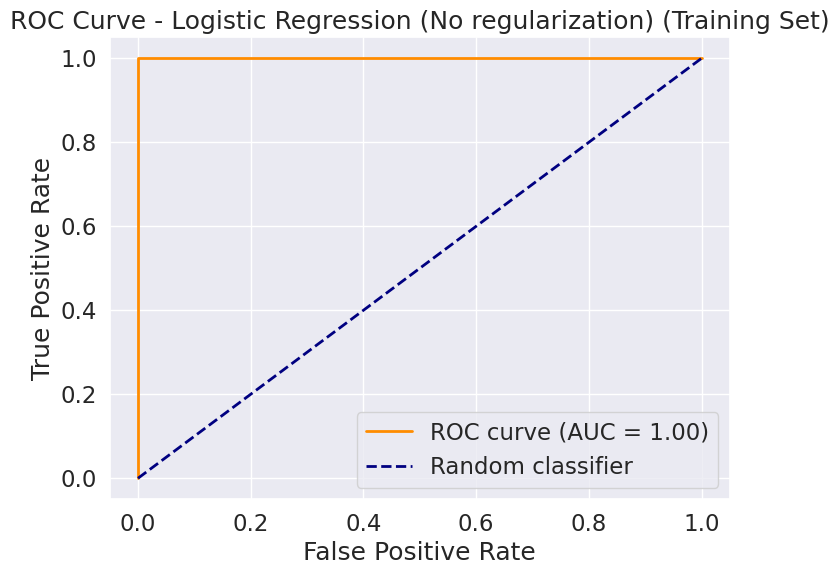

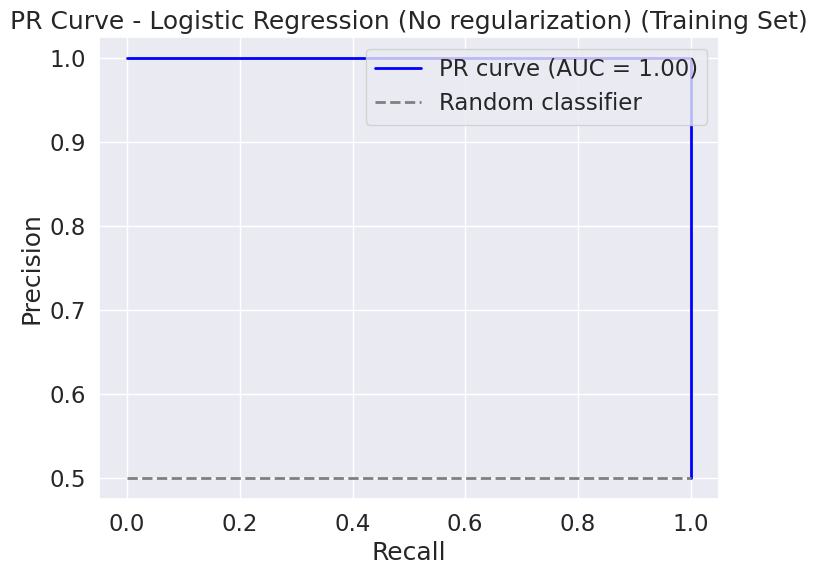


--- Validation Set ---
Confusion Matrix:
 [[90 20]
 [20 49]]
Accuracy: 0.7765
Precision: 0.7101
Recall (TPR or Sensitivity): 0.7101
F1 Score: 0.7101
TPR (True Positive Rate): 0.7101
FPR (False Positive Rate): 0.1818
TNR (True Negative Rate): 0.8182
FNR (False Negative Rate): 0.2899


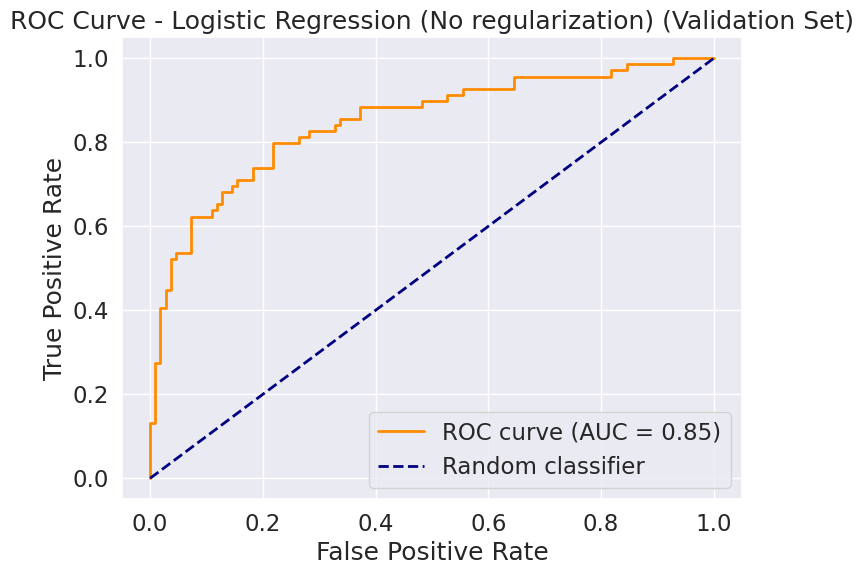

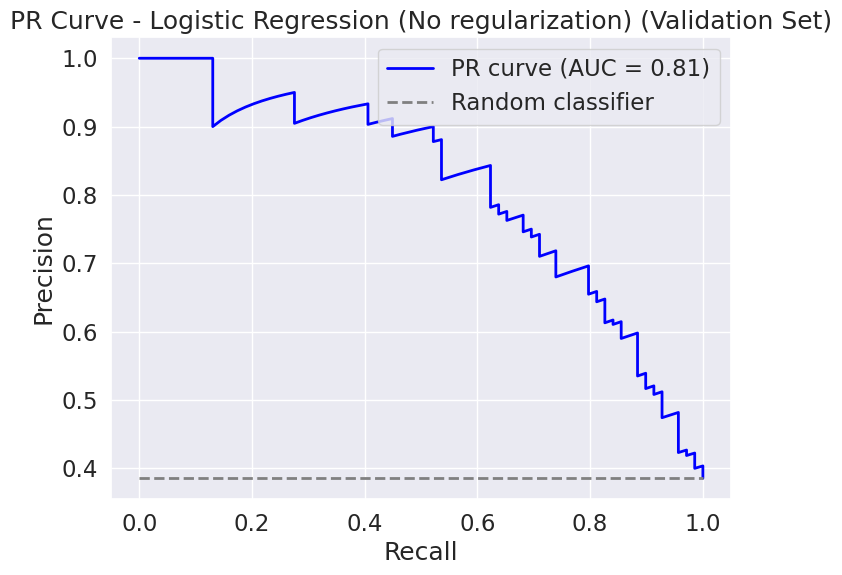

------------------------------


In [ ]:
logistic_regression = Pipeline(steps=[('classifier', LogisticRegression(penalty=None, solver='lbfgs', random_state=42))])
logistic_regression_model = build_and_evaluate_model(logistic_regression, X_train_resampled, y_train_resampled, X_val_processed, y_val, "Logistic Regression (No regularization)")

# Logistic Regrression (with L2)

--- Logistic Regression (L2) Evaluation (Threshold = 0.50)---

--- Training Set ---
Confusion Matrix:
 [[433   6]
 [ 19 420]]
Accuracy: 0.9715
Precision: 0.9859
Recall (TPR or Sensitivity): 0.9567
F1 Score: 0.9711
TPR (True Positive Rate): 0.9567
FPR (False Positive Rate): 0.0137
TNR (True Negative Rate): 0.9863
FNR (False Negative Rate): 0.0433


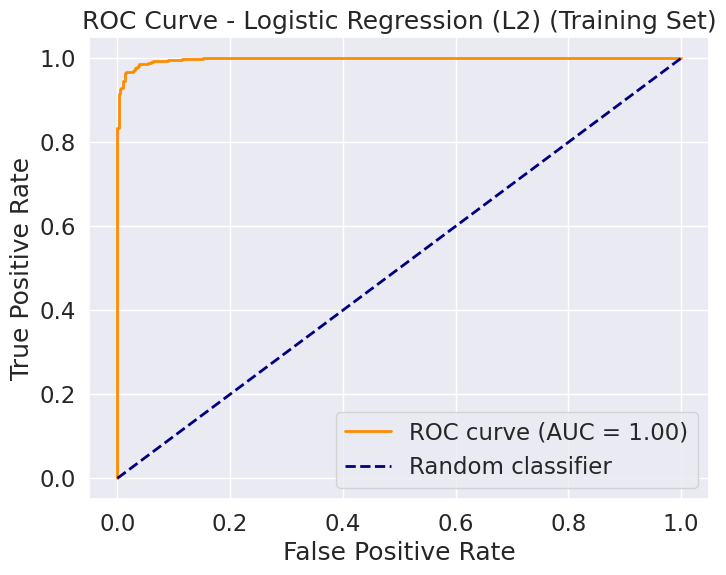

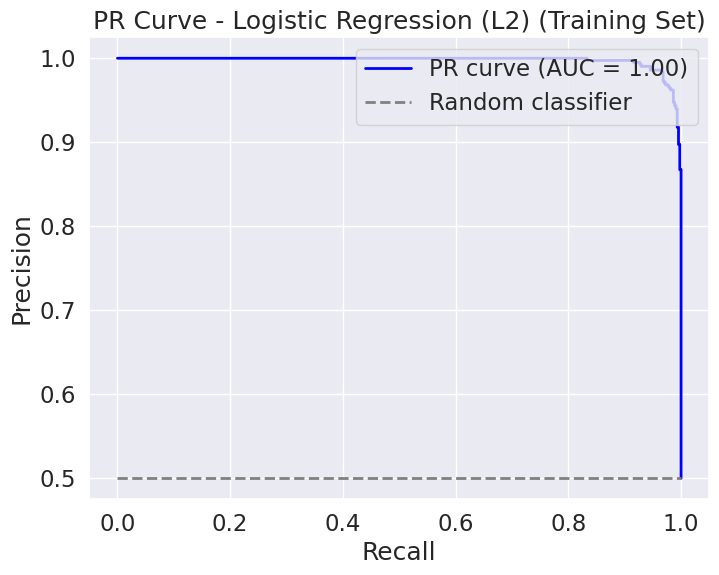


--- Validation Set ---
Confusion Matrix:
 [[92 18]
 [18 51]]
Accuracy: 0.7989
Precision: 0.7391
Recall (TPR or Sensitivity): 0.7391
F1 Score: 0.7391
TPR (True Positive Rate): 0.7391
FPR (False Positive Rate): 0.1636
TNR (True Negative Rate): 0.8364
FNR (False Negative Rate): 0.2609


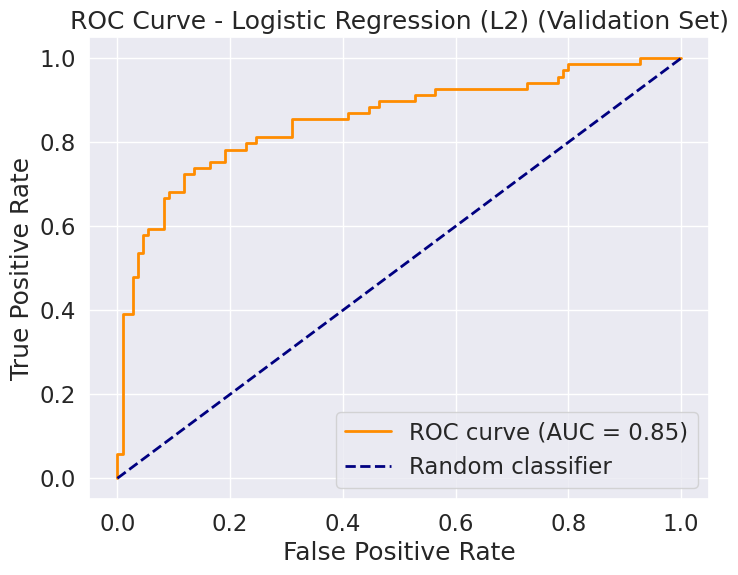

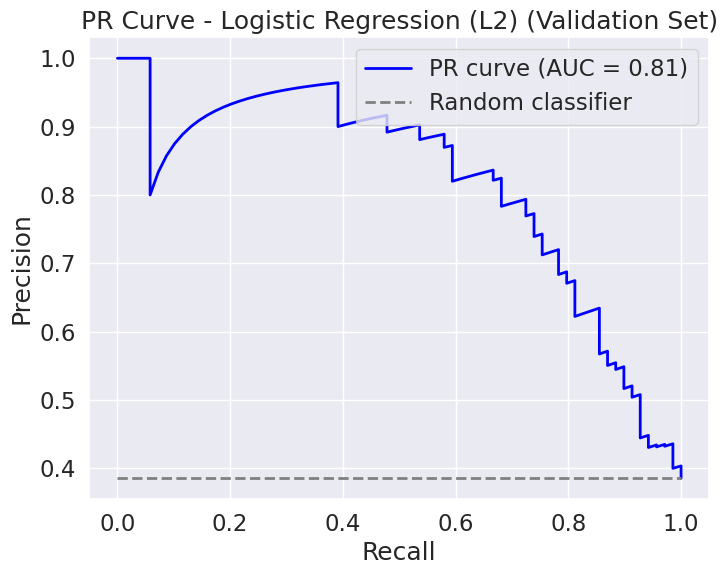

------------------------------


In [ ]:
logistic_regression_l2 = Pipeline(steps=[('classifier', LogisticRegression(penalty='l2', solver='lbfgs', random_state=42, C=1.0))])
logistic_regression_l2_model = build_and_evaluate_model(logistic_regression_l2, X_train_resampled, y_train_resampled, X_val_processed, y_val, "Logistic Regression (L2)")


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

--- Random Forest Evaluation (Threshold = 0.50)---

--- Training Set ---
Confusion Matrix:
 [[437   2]
 [  2 437]]
Accuracy: 0.9954
Precision: 0.9954
Recall (TPR or Sensitivity): 0.9954
F1 Score: 0.9954
TPR (True Positive Rate): 0.9954
FPR (False Positive Rate): 0.0046
TNR (True Negative Rate): 0.9954
FNR (False Negative Rate): 0.0046


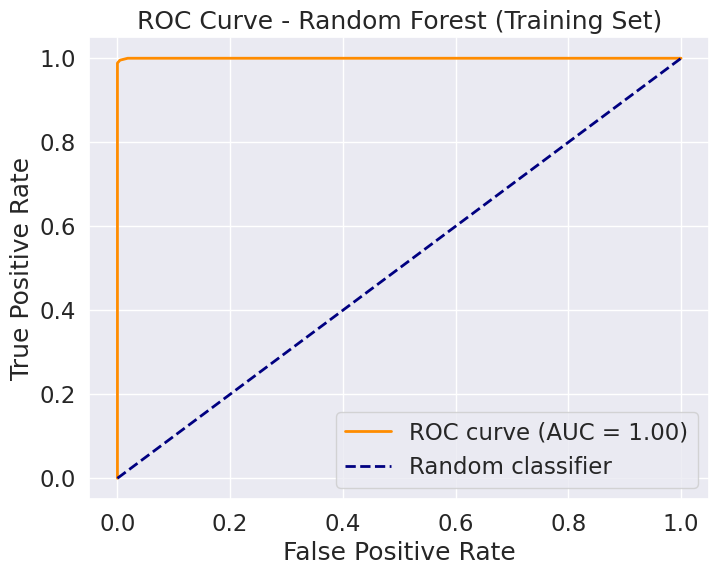

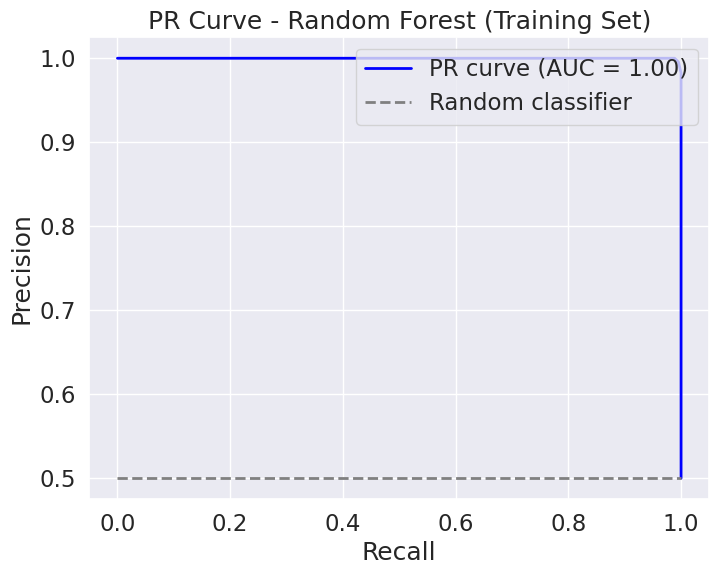


--- Validation Set ---
Confusion Matrix:
 [[93 17]
 [21 48]]
Accuracy: 0.7877
Precision: 0.7385
Recall (TPR or Sensitivity): 0.6957
F1 Score: 0.7164
TPR (True Positive Rate): 0.6957
FPR (False Positive Rate): 0.1545
TNR (True Negative Rate): 0.8455
FNR (False Negative Rate): 0.3043


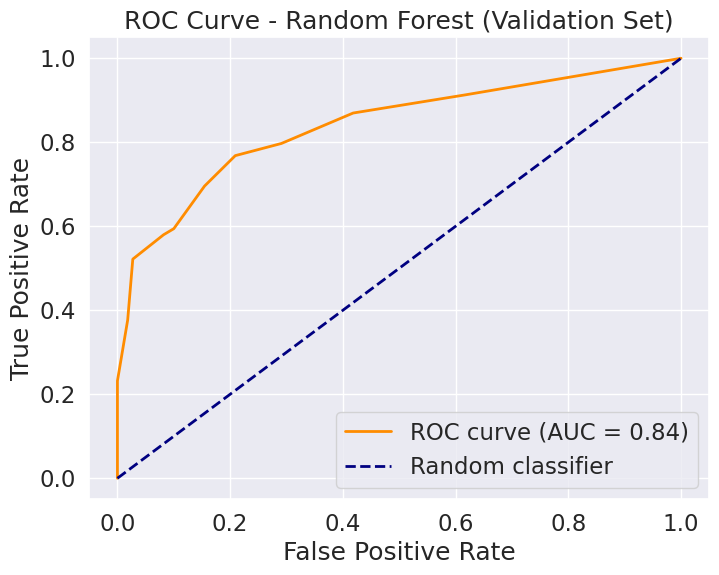

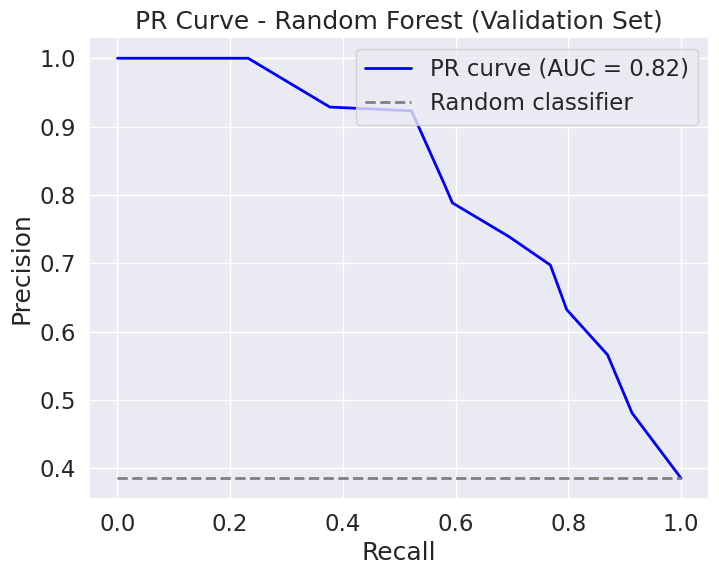

------------------------------


In [ ]:
random_forest = Pipeline(steps=[('classifier', RandomForestClassifier(random_state=42, n_estimators=10))])
random_forest_model = build_and_evaluate_model(random_forest, X_train_resampled, y_train_resampled, X_val_processed, y_val, "Random Forest")


# Prediction on the Test Data (using the best model)

In [ ]:
X_test_processed = preprocessor.transform(test_df)

test_predictions = random_forest_model.predict(X_test_processed)
prediction_df = pd.DataFrame({'ID': test_df['PassengerId'], 'Survived': test_predictions})
prediction_df.to_csv('prediction.csv', index=False)
print("\n'prediction.csv' has been created.")
prediction_df


'prediction.csv' has been created.


,ID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
